In [1]:
#import required library
import pandas as pd

In [2]:
#load data
df=pd.read_csv('https://raw.githubusercontent.com/diogoalvesderesende/datasets/Datasets/Udemy_wikipedia_visits.csv',
              index_col="Date",parse_dates=True)
df.head()

,Udemy,Easter,Christmas
Date,,,
2016-01-01,311,0,0
2016-01-02,564,0,0
2016-01-03,517,0,0
2016-01-04,652,0,0
2016-01-05,756,0,0


In [3]:
#shape of dataset
df.shape

(1827, 3)

In [4]:
#columns present in dataset
df.columns

Index(['Udemy', 'Easter', 'Christmas'], dtype='object')

In [5]:
#datatypes of every column
df.dtypes

Udemy        int64
Easter       int64
Christmas    int64
dtype: object

In [6]:
#info function
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1827 entries, 2016-01-01 to 2020-12-31
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Udemy      1827 non-null   int64
 1   Easter     1827 non-null   int64
 2   Christmas  1827 non-null   int64
dtypes: int64(3)
memory usage: 57.1 KB


In [7]:
#statistical measures
df.describe()

,Udemy,Easter,Christmas
count,1827.000000,1827.000000,1827.000000
mean,943.068418,0.002737,0.002737
std,531.341700,0.052256,0.052256
min,209.000000,0.000000,0.000000
25%,542.500000,0.000000,0.000000
50%,832.000000,0.000000,0.000000
75%,1175.000000,0.000000,0.000000
max,2847.000000,1.000000,1.000000


In [8]:
#missing value
df.isna().sum()

Udemy        0
Easter       0
Christmas    0
dtype: int64

In [9]:
# length of data
len(df)

1827

In [12]:
#train test split
train=df.iloc[:-31,:1]
test=df.iloc[-31:,:1]
print(train.shape)
print(test.shape)

(1796, 1)
(31, 1)


In [26]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
#build model
import pmdarima
from pmdarima import auto_arima
model=auto_arima(y=train, m=7)

In [40]:
# prediction
predictions=pd.Series(model.predict(n_periods=len(test)))
predictions.index=test.index
predictions[:5]

Date
2020-12-01    2453.355100
2020-12-02    2312.500996
2020-12-03    2301.725080
2020-12-04    2290.400729
2020-12-05    1876.605656
dtype: float64

In [37]:
predictions=model.predict(n_periods=len(test))
predictions=pd.DataFrame(data=predictions, columns=['Udemy'])
predictions

,Udemy
2020-12-01,2453.355100
2020-12-02,2312.500996
2020-12-03,2301.725080
2020-12-04,2290.400729
2020-12-05,1876.605656
2020-12-06,1923.690938
2020-12-07,2388.985415
2020-12-08,2316.424817
2020-12-09,2209.713408
2020-12-10,2222.004884


<AxesSubplot:xlabel='Date'>

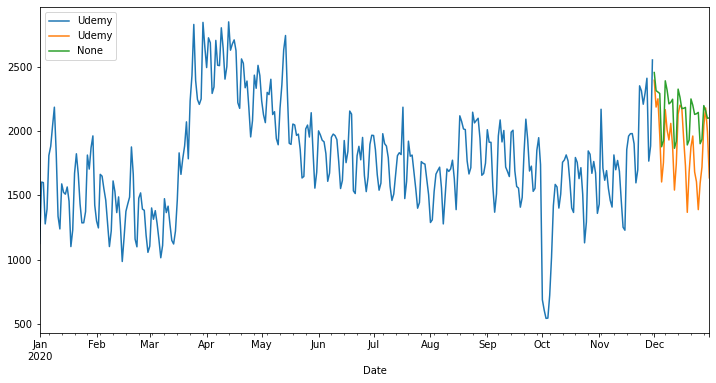

In [45]:
#plot train test & prediction to compare
train['Udemy']['2020-01-01':].plot(figsize=(12,6), legend=True)
test['Udemy'].plot(legend=True)
predictions.plot(legend=True)